In [66]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sei3h2rdxt import build_model

In [80]:
N = 60000000
N_I = 1000
cm = build_model(N=N, etaCT=0.2)

3.04


In [81]:
y0=np.zeros(len(cm.states))
y0[0] = N-N_I
y0[1] = N_I

t = np.linspace(0, 360, 2000)

traj = cm.integrate(t, y0)

In [82]:
# Statistics:

print('Final deaths: {0:.3f}%'.format(traj['y'][-1,-1]*100/N))
print('Peak infected: {0:.3f}%'.format(np.amax(traj['y'][:,[2,3,4,8,9,10]])*100/N))
print('Peak ICU use: {0:.3f}%'.format(np.amax(traj['y'][:,-2])*100/N))
print('Peak hospitalization: {0:.3f}%'.format(np.amax(traj['y'][:,-3])*100/N))
print('Peak isolated: {0:.3f}%'.format(np.amax(np.sum(traj['y'][:,6:12], axis=1))*100/N))

Final deaths: 0.003%
Peak infected: 0.004%
Peak ICU use: 0.001%
Peak hospitalization: 0.003%
Peak isolated: 0.074%


<IPython.core.display.Javascript object>


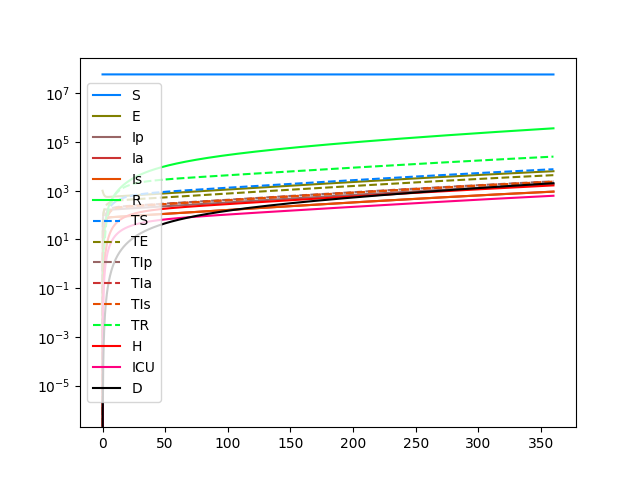

In [83]:
fig, ax = plt.subplots()

cmap = {
    'S': (0, 0.5, 1.0),
    'E': (0.5, 0.5, 0.0),
    'Ip': (0.6, 0.4, 0.4),
    'Ia': (0.8, 0.2, 0.2),
    'Is': (0.9, 0.3, 0),
    'R': (0, 1.0, 0.2),
    'H': (1.0, 0, 0),
    'ICU': (1.0, 0, 0.5),
    'D': (0, 0, 0)
}

for i, s in enumerate(cm.states):
    if s[0] == 'T':
        c = cmap[s[1:]]
        dt = '--'
    else:
        c = cmap[s]
        dt = '-'
    ax.semilogy(t, traj['y'][:,i], label=s, c=c, ls=dt)
    
ax.legend()

In [93]:
eCTrange = np.linspace(0, 0.4, 50)

deaths = []
for eCT in eCTrange:
    N = 60000000
    N_I = 1000
    cm = build_model(N=N, etaCT=eCT)
    
    y0=np.zeros(len(cm.states))
    y0[0] = N-N_I
    y0[1] = N_I

    t = np.linspace(0, 360, 2000)

    traj = cm.integrate(t, y0)
    
    deaths.append(traj['y'][-1,-1])

R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04
R0 = 3.04


<IPython.core.display.Javascript object>


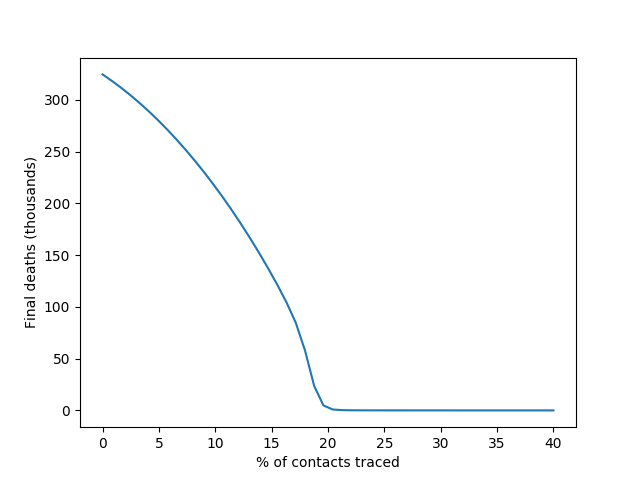

In [97]:
fig, ax = plt.subplots()

ax.set_xlabel('% of contacts traced')
ax.set_ylabel('Final deaths (thousands)')
ax.plot(eCTrange*100, np.array(deaths)/1000)